## Figure3: Effect of gestures on entropy-related activations

This notebook contains all code used to set up figure 3, which contains group-level results from an activation-based GLM analysis done in SPM. Results are displayed on a glass-brain representation (3A), implemented with [nilearn](https://nilearn.github.io/modules/generated/nilearn.plotting.plot_glass_brain.html), supported by estimation statistics (3B) implemented with [DABEST](https://acclab.github.io/DABEST-python-docs/index.html), comparing VOI eigenvariates between gesture ('keywords') and non-gesture (non-keywords) conditions. The chosen contrast illustrates the effect that gestures have on the activation increase associated with low entropy during natural language processing.

In [21]:
from nilearn import plotting
from matplotlib import pyplot as plt
import numpy as np
import scipy.io as io
import pandas as pd
import dabest as db

In [22]:
## VOI betas for Entropy Decrease NK>K

MTL_L = io.loadmat('data\\beta_values\\VOI_MTL_L_negEnt_NK_K.mat')
mPFC = io.loadmat('data\\beta_values\\VOI_mPFC_negEnt_NK_K.mat')
AG_L = io.loadmat('data\\beta_values\\VOI_AG_L_negEnt_NK_K.mat')
IFG_L = io.loadmat('data\\beta_values\\VOI_IFG_L_negEnt_NK_K.mat')

In [23]:
# constructing Dataframe that fits with dabest
df = pd.DataFrame()

for region, name in [(MTL_L, 'MTL_L'), (mPFC, 'mPFC'), (AG_L, 'AG_L'), (IFG_L, 'IFG_L')]:
    
    Y = np.array(region['Y']).flatten()
    df[name + '_nonkeyE'] = Y[[i for i in range(3, len(Y), 4)]]
    df[name + '_keyE'] = Y[[i for i in range(2, len(Y), 4)]]

In [24]:
# dabest
all_VOI = db.load(df, idx=[(df.columns[i], df.columns[i+1]) for i in range(0, len(df.columns), 2)])

In [25]:
# load spm
entropy_dec_NK_K = 'data\\Entropy_Decrease_NK_K_p001_k89.nii'

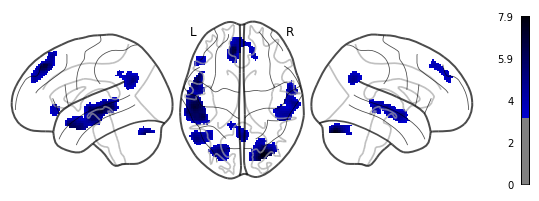

In [28]:
# plotting glass brain
display = plotting.plot_glass_brain(entropy_dec_NK_K, display_mode = 'lzr', colorbar = True, threshold = 3.2, cmap= plotting.cm.black_blue_r)
display.savefig("Figure3A.png")

C:\Users\gffun\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
C:\Users\gffun\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\gffun\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


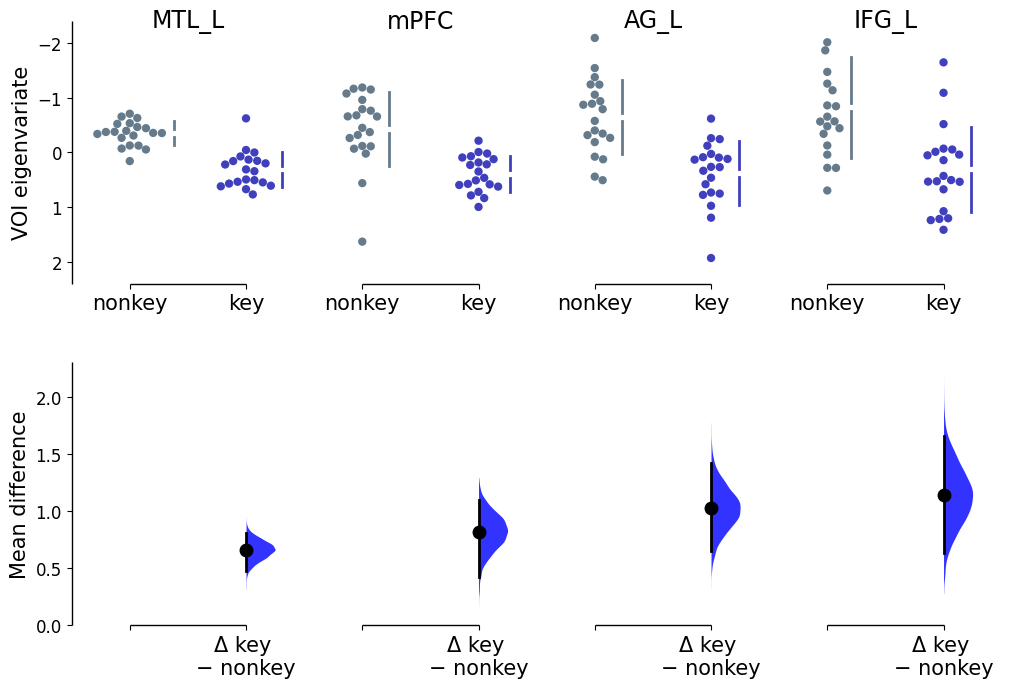

In [29]:
# plotting with dabest

# sizes for text
sz = 15
header_sz = 17

# custom color palette
my_color_palette = dict(zip(df.columns, ['#517ea0', 'blue'] * 4))

# initialize figure
f = all_VOI.mean_diff.plot(swarm_label="VOI eigenvariate", contrast_ylim = (0, 2.3), custom_palette = my_color_palette, swarm_ylim = (2.4, -2.4), fig_size = (12, 8))

# get axes
rawswarm_axes = f.axes[0]
contrast_axes = f.axes[1]

# axes labels, tick params
rawswarm_axes.set_ylabel("VOI eigenvariate",fontsize = sz)
contrast_axes.set_ylabel("Mean difference",fontsize = sz)
rawswarm_axes.set_xticklabels([ 'nonkey', 'key']*4, fontsize = sz)
contrast_axes.set_xticklabels(['','Δ key \n− nonkey']*4, fontsize = sz)
rawswarm_axes.tick_params(axis = 'y', labelsize = 12)
contrast_axes.tick_params(axis = 'y', labelsize = 12)

# 'headers' are the names of the corresponding VOIs
header_positions = [0.125*(i+1) for i in range(0,8,2)]
for position, region in zip(header_positions, ['MTL_L', 'mPFC', 'AG_L', 'IFG_L']):
    rawswarm_axes.text(position, 1, region, horizontalalignment='center', verticalalignment='center', transform=rawswarm_axes.transAxes, fontsize = header_sz) #transform brings us into axes space
    
f.savefig('Figure3B')

## Figure 3

A: glass brain representation of activation differences associated with decrease in next-word entropy between key- and nonkey words (p = 0.001). Color indicates activation strength (T-values).
B: top: subject-wise eigenvariates for key- and nonkey words in each VOI. bottom: mean difference in eigenvariates between key- and nonkey words in each VOI. MTL_L : left mid-temporal lobe; mPFC: mid-prefrontal cotex; AG_L: left angular gyrus; IFG_L : inferior frontal gyrus.